In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['AC', 'AEV', 'AGI', 'ALI', 'AP', 'BDO', 'BPI', 'DMC', 'FGEN', 'GLO', 'GTCAP', 'ICT', 'JFC', 'JGS', 'LTG', 'MBT', 'MEG','MER','MPI','PCOR', 'PGOLD', 'RLC', 'RRHI', 'SCC', 'SECB', 'SM', 'SMC', 'SMPH', 'TEL', 'URC']
mydata = pd.read_csv('consoPSEi.csv', index_col='DATE')

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 1/3/2018 to 12/28/2018
Data columns (total 30 columns):
AC       239 non-null float64
AEV      239 non-null float64
AGI      239 non-null float64
ALI      239 non-null float64
AP       238 non-null float64
BDO      239 non-null float64
BPI      239 non-null float64
DMC      239 non-null float64
FGEN     238 non-null float64
GLO      239 non-null int64
GTCAP    239 non-null float64
ICT      239 non-null float64
JFC      239 non-null float64
JGS      239 non-null float64
LTG      239 non-null float64
MBT      239 non-null float64
MEG      239 non-null float64
MER      239 non-null float64
MPI      239 non-null float64
PCOR     239 non-null float64
PGOLD    239 non-null float64
RLC      239 non-null float64
RRHI     239 non-null float64
SCC      239 non-null float64
SECB     239 non-null float64
SM       239 non-null float64
SMC      239 non-null float64
SMPH     239 non-null float64
TEL      239 non-null int64
URC      239 non-nul

In [4]:
mydata.head()

,AC,AEV,AGI,ALI,AP,BDO,BPI,DMC,FGEN,GLO,...,PGOLD,RLC,RRHI,SCC,SECB,SM,SMC,SMPH,TEL,URC
DATE,,,,,,,,,,,,,,,,,,,,,
1/3/2018,1040.0,74.50,16.42,45.50,41.45,161.0,110.0,14.14,16.92,1875,...,49.25,21.55,97.0,36.10,253.8,1040.0,114.8,38.75,1497,154.0
1/4/2018,1040.0,76.00,16.46,44.25,41.40,160.0,112.7,14.44,16.60,1850,...,49.35,21.30,94.3,36.30,249.8,1050.0,115.9,39.50,1470,156.0
1/5/2018,1065.0,76.00,16.40,45.50,41.00,160.0,113.8,14.72,16.12,1805,...,49.50,21.40,94.1,36.35,246.0,1020.0,120.0,39.35,1445,163.9
1/8/2018,1057.0,75.95,16.24,45.20,41.55,156.3,113.8,14.50,15.90,1720,...,50.35,21.30,96.0,36.00,249.0,1025.0,121.5,38.40,1412,165.0
1/9/2018,1065.0,77.50,16.32,46.40,41.00,164.6,115.1,14.90,15.86,1690,...,53.95,21.20,95.0,36.55,252.6,1046.0,125.7,39.70,1419,174.0


In [5]:
mydata.head()

,AC,AEV,AGI,ALI,AP,BDO,BPI,DMC,FGEN,GLO,...,PGOLD,RLC,RRHI,SCC,SECB,SM,SMC,SMPH,TEL,URC
DATE,,,,,,,,,,,,,,,,,,,,,
1/3/2018,1040.0,74.50,16.42,45.50,41.45,161.0,110.0,14.14,16.92,1875,...,49.25,21.55,97.0,36.10,253.8,1040.0,114.8,38.75,1497,154.0
1/4/2018,1040.0,76.00,16.46,44.25,41.40,160.0,112.7,14.44,16.60,1850,...,49.35,21.30,94.3,36.30,249.8,1050.0,115.9,39.50,1470,156.0
1/5/2018,1065.0,76.00,16.40,45.50,41.00,160.0,113.8,14.72,16.12,1805,...,49.50,21.40,94.1,36.35,246.0,1020.0,120.0,39.35,1445,163.9
1/8/2018,1057.0,75.95,16.24,45.20,41.55,156.3,113.8,14.50,15.90,1720,...,50.35,21.30,96.0,36.00,249.0,1025.0,121.5,38.40,1412,165.0
1/9/2018,1065.0,77.50,16.32,46.40,41.00,164.6,115.1,14.90,15.86,1690,...,53.95,21.20,95.0,36.55,252.6,1046.0,125.7,39.70,1419,174.0


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [6]:
mydata.iloc[0]

AC       1040.00
AEV        74.50
AGI        16.42
ALI        45.50
AP         41.45
BDO       161.00
BPI       110.00
DMC        14.14
FGEN       16.92
GLO      1875.00
GTCAP    1293.00
ICT       108.00
JFC       255.40
JGS        76.50
LTG        18.74
MBT       104.60
MEG         5.28
MER       330.00
MPI         6.78
PCOR        9.23
PGOLD      49.25
RLC        21.55
RRHI       97.00
SCC        36.10
SECB      253.80
SM       1040.00
SMC       114.80
SMPH       38.75
TEL      1497.00
URC       154.00
Name: 1/3/2018, dtype: float64

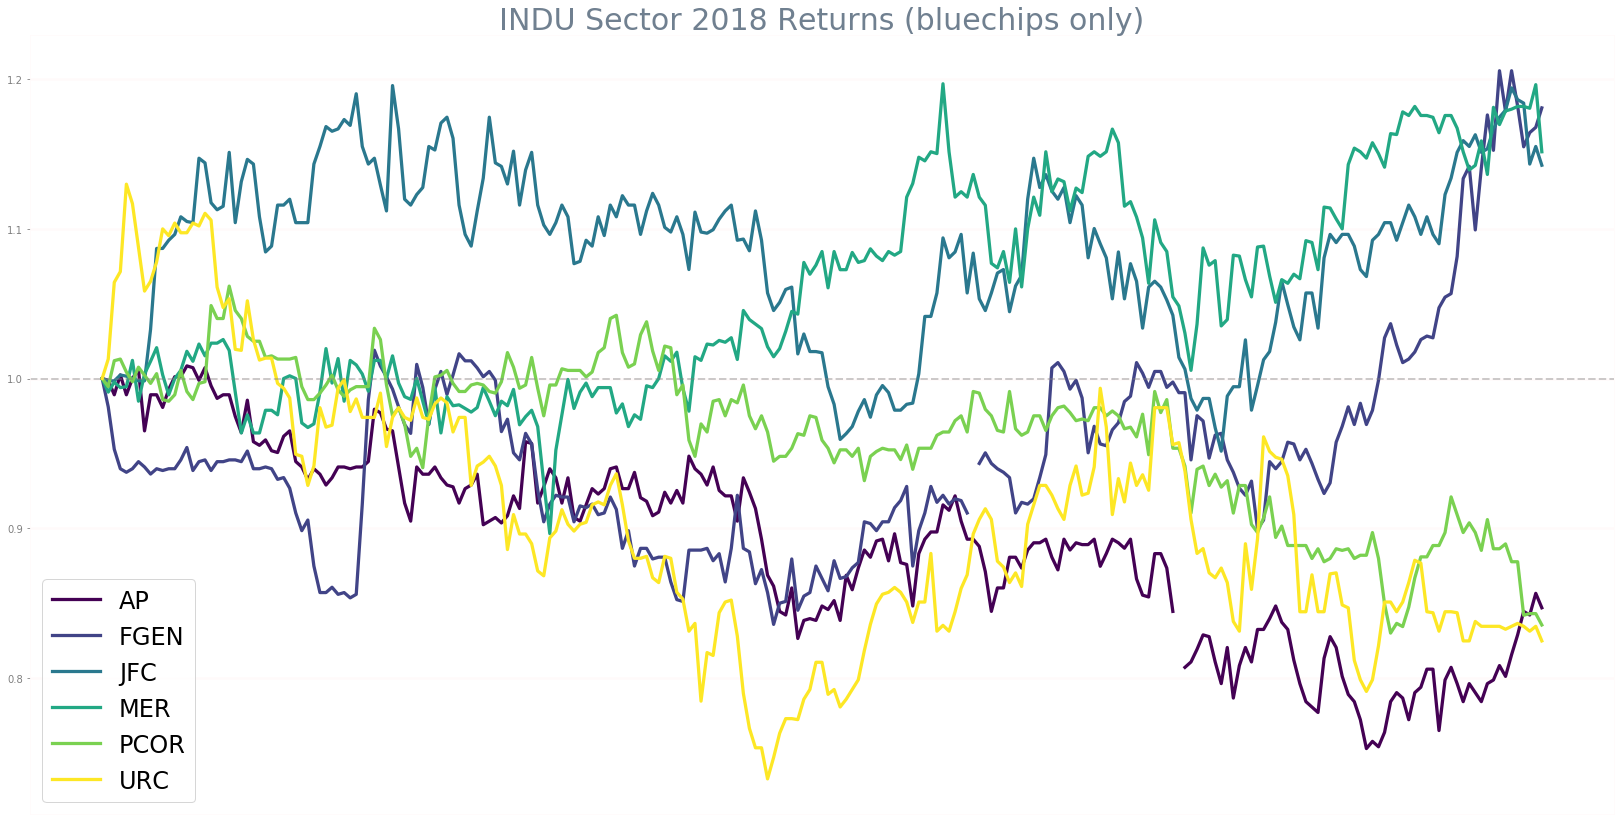

In [7]:
FINA = mydata[['BDO','BPI','MBT','SECB']]
MINI = mydata['SCC']
SERV = mydata[['GLO','ICT','PGOLD','RRHI','TEL']]
PROP = mydata[['ALI','MEG','RLC','SMPH']]
HOLD = mydata[['AC','AEV','AGI','DMC','GTCAP','JGS','LTG','MPI','SM','SMC']]
INDU = mydata[['AP','FGEN','JFC','MER','PCOR','URC']]

Sector = INDU

graph = Sector / (Sector.iloc[0])
plt.rc('axes',edgecolor='snow')
plt.rc_context({'ytick.color':'gray'})
graph.plot(figsize=(28.38,14.33), cmap='viridis', linewidth = 3.25)
plt.title('INDU ' + 'Sector 2018 Returns (bluechips only)', color='slategrey', size=30)
plt.axhline(1, color = 'gray', alpha = .4, linewidth = 2, linestyle = '--')
plt.axis('on')
plt.yticks()
plt.xticks([])
plt.xlabel('')
plt.grid(color='snow', linewidth=2.5)
plt.legend()
plt.legend(loc=3, prop={'size': 24})
plt.show()

## Calculating the Return of a Portfolio of Securities

In [8]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,AC,AEV,AGI,ALI,AP,BDO,BPI,DMC,FGEN,GLO,...,PGOLD,RLC,RRHI,SCC,SECB,SM,SMC,SMPH,TEL,URC
DATE,,,,,,,,,,,,,,,,,,,,,
1/3/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/4/2018,0.000000,0.020134,0.002436,-0.027473,-0.001206,-0.006211,0.024545,0.021216,-0.018913,-0.013333,...,0.002030,-0.011601,-0.027835,0.005540,-0.015760,0.009615,0.009582,0.019355,-0.018036,0.012987
1/5/2018,0.024038,0.000000,-0.003645,0.028249,-0.009662,0.000000,0.009760,0.019391,-0.028916,-0.024324,...,0.003040,0.004695,-0.002121,0.001377,-0.015212,-0.028571,0.035375,-0.003797,-0.017007,0.050641
1/8/2018,-0.007512,-0.000658,-0.009756,-0.006593,0.013415,-0.023125,0.000000,-0.014946,-0.013648,-0.047091,...,0.017172,-0.004673,0.020191,-0.009629,0.012195,0.004902,0.012500,-0.024142,-0.022837,0.006711
1/9/2018,0.007569,0.020408,0.004926,0.026549,-0.013237,0.053103,0.011424,0.027586,-0.002516,-0.017442,...,0.071500,-0.004695,-0.010417,0.015278,0.014458,0.020488,0.034568,0.033854,0.004958,0.054545


In [9]:
weights = np.array([0.0655, 0.0442, 0.0114, 0.0886, .0136, .0668,.0517, .0116, .0060, .0157, .0237, .0285, .0400, .0500, .0109, .0413, .0152, .0225, .0170, .0045, .0108, .0121, .0132, .0068, .0205, .1329, .0143, .0906, .0346, .0356])

In [10]:
np.dot(returns, weights)

array([            nan,  1.80336509e-03,  3.81223783e-03, -2.97288146e-03,
        1.99038229e-02, -4.57233449e-04, -1.19998025e-02,  5.78723258e-04,
        5.59592055e-03,  1.53911322e-03, -2.12855920e-03, -3.08286642e-03,
        1.04440522e-02,  4.28137179e-03,  5.74201668e-03, -7.92324381e-03,
        9.26885856e-03,  4.23064584e-03,  2.31308095e-03, -1.61174346e-02,
       -1.62228247e-02,  5.78395628e-03, -2.24974336e-02, -7.16008057e-03,
        1.10561384e-02, -1.63333347e-02, -2.18782625e-03,  9.87762272e-03,
        3.75427848e-03,  2.04663129e-03,  1.12773962e-02,  1.75596785e-03,
       -1.27291180e-02, -1.16701572e-02, -5.46662077e-03,  3.87350930e-03,
        1.10659203e-02, -1.37809390e-02,  3.03541941e-05, -7.87536404e-04,
       -8.07769017e-03, -2.82348603e-03,  5.07833083e-03, -2.35001293e-03,
       -6.49882267e-04,  5.68109528e-03, -8.42367681e-03, -1.96947429e-02,
        5.72271916e-03, -4.59936643e-04, -2.10853601e-02, -1.86868619e-02,
        2.81714066e-02, -

***

In [11]:
annual_returns = returns.mean() * 242
annual_returns

AC      -0.104733
AEV     -0.229058
AGI     -0.291315
ALI     -0.073506
AP      -0.091314
BDO     -0.167463
BPI     -0.111345
DMC     -0.029213
FGEN     0.174270
GLO      0.082404
GTCAP   -0.219658
ICT     -0.046512
JFC      0.175656
JGS     -0.247605
LTG     -0.067288
MBT     -0.221229
MEG     -0.051874
MER      0.179676
MPI     -0.325055
PCOR    -0.159505
PGOLD   -0.109632
RLC     -0.003237
RRHI    -0.156172
SCC     -0.400660
SECB    -0.462799
SM      -0.081348
SMC      0.288699
SMPH    -0.037630
TEL     -0.242133
URC     -0.139813
dtype: float64

In [12]:
np.dot(annual_returns, weights)

-0.10669130198880349

In [13]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print(pfolio_1)

-10.668999999999999 %


In [14]:
returns = np.log(mydata / mydata.shift(1))
returns.head()

,AC,AEV,AGI,ALI,AP,BDO,BPI,DMC,FGEN,GLO,...,PGOLD,RLC,RRHI,SCC,SECB,SM,SMC,SMPH,TEL,URC
DATE,,,,,,,,,,,,,,,,,,,,,
1/3/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/4/2018,0.000000,0.019934,0.002433,-0.027857,-0.001207,-0.006231,0.024249,0.020994,-0.019094,-0.013423,...,0.002028,-0.011669,-0.028230,0.005525,-0.015886,0.009569,0.009536,0.019170,-0.018201,0.012903
1/5/2018,0.023754,0.000000,-0.003652,0.027857,-0.009709,0.000000,0.009713,0.019205,-0.029342,-0.024625,...,0.003035,0.004684,-0.002123,0.001376,-0.015329,-0.028988,0.034764,-0.003805,-0.017153,0.049400
1/8/2018,-0.007540,-0.000658,-0.009804,-0.006615,0.013325,-0.023397,0.000000,-0.015058,-0.013742,-0.048236,...,0.017026,-0.004684,0.019990,-0.009675,0.012121,0.004890,0.012423,-0.024439,-0.023102,0.006689
1/9/2018,0.007540,0.020203,0.004914,0.026202,-0.013325,0.051741,0.011359,0.027213,-0.002519,-0.017596,...,0.069059,-0.004706,-0.010471,0.015162,0.014354,0.020281,0.033984,0.033294,0.004945,0.053110


In [15]:
vols = returns[['AC', 'AEV', 'AGI', 'ALI', 'AP', 'BDO', 'BPI', 'DMC', 'FGEN', 'GLO', 'GTCAP', 'ICT', 'JFC', 'JGS', 'LTG', 'MBT', 'MEG','MER','MPI','PCOR', 'PGOLD', 'RLC', 'RRHI', 'SCC', 'SECB', 'SM', 'SMC', 'SMPH', 'TEL', 'URC']].std() * 242 ** 0.5 *100
vols

AC       29.142121
AEV      39.848474
AGI      26.830984
ALI      29.160861
AP       25.637843
BDO      29.582835
BPI      31.146545
DMC      38.438526
FGEN     28.431919
GLO      37.193543
GTCAP    36.683307
ICT      25.219529
JFC      28.364307
JGS      38.822189
LTG      33.439650
MBT      28.125648
MEG      33.414159
MER      26.927699
MPI      34.846039
PCOR     21.675194
PGOLD    23.876351
RLC      36.112579
RRHI     28.190167
SCC      33.330718
SECB     27.702749
SM       30.416925
SMC      27.255460
SMPH     29.328597
TEL      31.134975
URC      33.579076
dtype: float64

In [16]:
returns[['AC', 'AEV', 'AGI', 'ALI', 'AP', 'BDO', 'BPI', 'DMC', 'FGEN', 'GLO', 'GTCAP', 'ICT', 'JFC', 'JGS', 'LTG', 'MBT', 'MEG','MER','MPI','PCOR', 'PGOLD', 'RLC', 'RRHI', 'SCC', 'SECB', 'SM', 'SMC', 'SMPH', 'TEL', 'URC']].mean() * 242

AC      -0.147011
AEV     -0.308566
AGI     -0.327373
ALI     -0.115859
AP      -0.124067
BDO     -0.211226
BPI     -0.159827
DMC     -0.102826
FGEN     0.133836
GLO      0.013468
GTCAP   -0.287027
ICT     -0.078255
JFC      0.135477
JGS     -0.322644
LTG     -0.123296
MBT     -0.260620
MEG     -0.107559
MER      0.143450
MPI     -0.385637
PCOR    -0.182965
PGOLD   -0.137990
RLC     -0.068300
RRHI    -0.195923
SCC     -0.456167
SECB    -0.501409
SM      -0.127430
SMC      0.251396
SMPH    -0.080514
TEL     -0.290481
URC     -0.196005
dtype: float64

In [17]:
returns[['AC', 'AEV', 'AGI', 'ALI', 'AP', 'BDO', 'BPI', 'DMC', 'FGEN', 'GLO', 'GTCAP', 'ICT', 'JFC', 'JGS', 'LTG', 'MBT', 'MEG','MER','MPI','PCOR', 'PGOLD', 'RLC', 'RRHI', 'SCC', 'SECB', 'SM', 'SMC', 'SMPH', 'TEL', 'URC']].std() * 242 ** 0.5

AC       0.291421
AEV      0.398485
AGI      0.268310
ALI      0.291609
AP       0.256378
BDO      0.295828
BPI      0.311465
DMC      0.384385
FGEN     0.284319
GLO      0.371935
GTCAP    0.366833
ICT      0.252195
JFC      0.283643
JGS      0.388222
LTG      0.334397
MBT      0.281256
MEG      0.334142
MER      0.269277
MPI      0.348460
PCOR     0.216752
PGOLD    0.238764
RLC      0.361126
RRHI     0.281902
SCC      0.333307
SECB     0.277027
SM       0.304169
SMC      0.272555
SMPH     0.293286
TEL      0.311350
URC      0.335791
dtype: float64

In [18]:
cov_matrix_a = returns.cov() * 242
cov_matrix_a

,AC,AEV,AGI,ALI,AP,BDO,BPI,DMC,FGEN,GLO,...,PGOLD,RLC,RRHI,SCC,SECB,SM,SMC,SMPH,TEL,URC
AC,0.084926,0.032926,0.016044,0.035945,0.017922,0.025127,0.019052,0.034720,0.003813,0.041003,...,0.017390,0.026639,0.015292,0.013766,0.020989,0.030245,0.013115,0.033126,0.027535,0.029643
AEV,0.032926,0.158790,0.023344,0.022379,0.029449,0.036876,0.039231,0.061875,0.012365,0.021143,...,0.004454,0.024999,0.015991,0.031760,0.022132,0.040985,0.014839,0.033419,0.030747,0.038585
AGI,0.016044,0.023344,0.071990,0.026585,0.014778,0.035988,0.016420,0.033305,0.011456,0.020413,...,0.008614,0.027739,0.002085,0.013544,0.013412,0.024553,0.006858,0.021998,0.028052,0.030016
ALI,0.035945,0.022379,0.026585,0.085036,0.018742,0.032875,0.023937,0.035311,0.008398,0.022910,...,0.016361,0.028540,0.010498,0.017979,0.021742,0.040606,0.014620,0.044985,0.023182,0.040709
AP,0.017922,0.029449,0.014778,0.018742,0.065730,0.024392,0.015240,0.031761,0.011716,0.025149,...,0.001385,0.028410,0.005069,0.011104,0.017754,0.021719,0.005359,0.022405,0.025008,0.017212
BDO,0.025127,0.036876,0.035988,0.032875,0.024392,0.087514,0.031832,0.038981,0.005661,0.031212,...,0.015587,0.020068,0.001795,0.012501,0.033209,0.038739,0.007210,0.028644,0.028376,0.043504
BPI,0.019052,0.039231,0.016420,0.023937,0.015240,0.031832,0.097011,0.029859,0.012037,0.027774,...,0.012500,0.009428,0.006973,0.019612,0.016532,0.022091,0.007586,0.022160,0.025746,0.025614
DMC,0.034720,0.061875,0.033305,0.035311,0.031761,0.038981,0.029859,0.147752,0.018919,0.029080,...,0.008380,0.042630,0.003739,0.030716,0.018553,0.039569,0.010913,0.040943,0.043315,0.031276
FGEN,0.003813,0.012365,0.011456,0.008398,0.011716,0.005661,0.012037,0.018919,0.080837,0.022007,...,-0.000599,0.024792,0.005770,0.011612,0.005913,0.018030,0.010774,0.013591,0.011010,0.005435
GLO,0.041003,0.021143,0.020413,0.022910,0.025149,0.031212,0.027774,0.029080,0.022007,0.138336,...,0.001429,0.024346,0.009646,0.024002,0.009504,0.038816,0.009961,0.032928,0.038075,0.023965


In [19]:
corr_matrix = returns.corr()
corr_matrix

,AC,AEV,AGI,ALI,AP,BDO,BPI,DMC,FGEN,GLO,...,PGOLD,RLC,RRHI,SCC,SECB,SM,SMC,SMPH,TEL,URC
AC,1.000000,0.283533,0.205190,0.422972,0.239792,0.291459,0.209901,0.309953,0.045892,0.378289,...,0.249920,0.253124,0.186139,0.141725,0.259982,0.341205,0.165123,0.387571,0.303466,0.302925
AEV,0.283533,1.000000,0.218341,0.192587,0.287337,0.312817,0.316091,0.403961,0.108959,0.142656,...,0.046814,0.173719,0.142353,0.239122,0.200489,0.338144,0.136624,0.285947,0.247822,0.288362
AGI,0.205190,0.218341,1.000000,0.339780,0.214342,0.453401,0.196489,0.322926,0.150318,0.204548,...,0.134464,0.286283,0.027561,0.151451,0.180435,0.300851,0.093776,0.279550,0.335802,0.333154
ALI,0.422972,0.192587,0.339780,1.000000,0.251706,0.381092,0.263548,0.315026,0.101037,0.211233,...,0.234982,0.271019,0.127701,0.184981,0.269140,0.457799,0.183941,0.525992,0.255326,0.415742
AP,0.239792,0.287337,0.214342,0.251706,1.000000,0.323150,0.192288,0.323662,0.159448,0.266548,...,0.022580,0.306980,0.070690,0.129456,0.248996,0.278719,0.076377,0.298492,0.318374,0.199423
BDO,0.291459,0.312817,0.453401,0.381092,0.323150,1.000000,0.345476,0.342801,0.067055,0.283669,...,0.220669,0.187844,0.021529,0.126785,0.405227,0.430525,0.089417,0.330143,0.308082,0.437944
BPI,0.209901,0.316091,0.196489,0.263548,0.192288,0.345476,1.000000,0.249398,0.135363,0.239753,...,0.168092,0.083824,0.079420,0.188912,0.191602,0.233184,0.089364,0.242587,0.265496,0.244906
DMC,0.309953,0.403961,0.322926,0.315026,0.323662,0.342801,0.249398,1.000000,0.173137,0.203404,...,0.091310,0.307105,0.034504,0.239745,0.174234,0.338434,0.104166,0.363180,0.361927,0.242311
FGEN,0.045892,0.108959,0.150318,0.101037,0.159448,0.067055,0.135363,0.173137,1.000000,0.213198,...,-0.008787,0.242863,0.071691,0.122060,0.074789,0.207665,0.138520,0.163267,0.124214,0.056984
GLO,0.378289,0.142656,0.204548,0.211233,0.266548,0.283669,0.239753,0.203404,0.213198,1.000000,...,0.016091,0.181260,0.091996,0.193613,0.092244,0.343103,0.098261,0.301862,0.328791,0.191882


In [20]:
import seaborn as sns

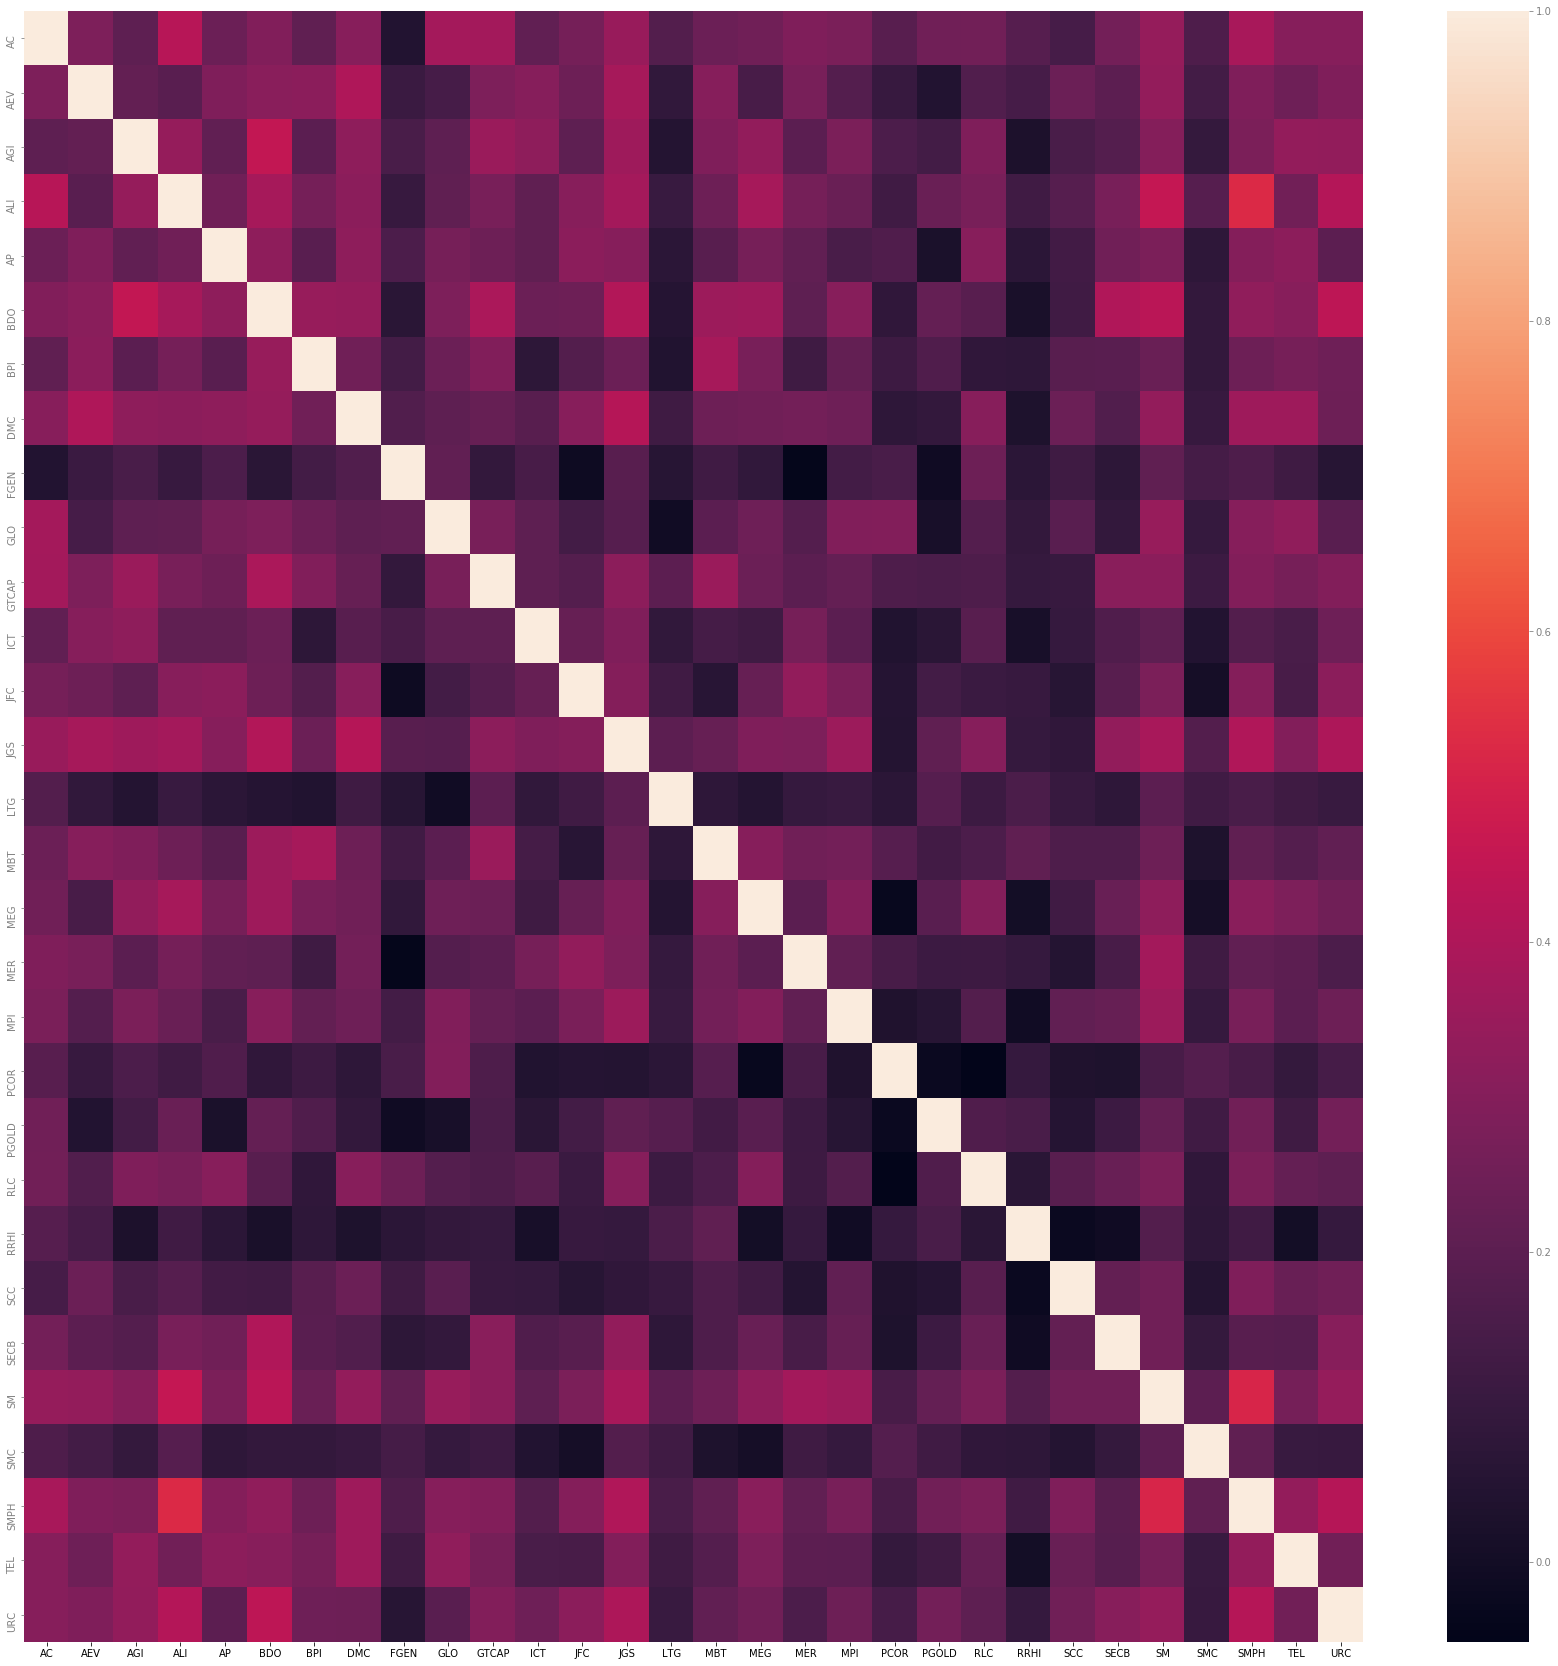

In [21]:
figsize = (30, 30)
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(data=corr_matrix)

In [22]:
weights = np.array([0.0655, 0.0442, 0.0114, 0.0886, .0136, .0668,.0517, .0116, .0060, .0157, .0237, .0285, .0400, .0500, .0109, .0413, .0152, .0225, .0170, .0045, .0108, .0121, .0132, .0068, .0205, .1329, .0143, .0906, .0346, .0356])

In [23]:
pfolio_var = np.dot(weights.T, np.dot(returns.cov() * 242, weights))
pfolio_var
print (str(round(pfolio_var, 5) * 100) + ' %')

3.138 %


In [24]:
pfolio_vol = (np.dot(weights.T, np.dot(returns.cov() * 242, weights))) ** 0.5
pfolio_vol
print (str(round(pfolio_vol, 5) * 100) + ' %')

17.714 %


In [25]:
Var = returns[['AC', 'AEV', 'AGI', 'ALI', 'AP', 'BDO', 'BPI', 'DMC', 'FGEN', 'GLO', 'GTCAP', 'ICT', 'JFC', 'JGS', 'LTG', 'MBT', 'MEG','MER','MPI','PCOR', 'PGOLD', 'RLC', 'RRHI', 'SCC', 'SECB', 'SM', 'SMC', 'SMPH', 'TEL', 'URC']].var() * 242
Var

AC       0.084926
AEV      0.158790
AGI      0.071990
ALI      0.085036
AP       0.065730
BDO      0.087514
BPI      0.097011
DMC      0.147752
FGEN     0.080837
GLO      0.138336
GTCAP    0.134567
ICT      0.063602
JFC      0.080453
JGS      0.150716
LTG      0.111821
MBT      0.079105
MEG      0.111651
MER      0.072510
MPI      0.121425
PCOR     0.046981
PGOLD    0.057008
RLC      0.130412
RRHI     0.079469
SCC      0.111094
SECB     0.076744
SM       0.092519
SMC      0.074286
SMPH     0.086017
TEL      0.096939
URC      0.112755
dtype: float64

In [26]:
dr = pfolio_var - (weights[0] ** 2 * Var[0]) - (weights[1] ** 2 * Var[1]) - (weights[2] ** 2 * Var[2]) - (weights[3] ** 2 * Var[3]) - (weights[4] ** 2 * Var[4]) - (weights[5] ** 2 * Var[5]) - (weights[6] ** 2 * Var[6]) - (weights[7] ** 2 * Var[7]) - (weights[8] ** 2 * Var[8]) - (weights[9] ** 2 * Var[9]) - (weights[10] ** 2 * Var[10]) - (weights[11] ** 2 * Var[11]) - (weights[12] ** 2 * Var[12])- (weights[13] ** 2 * Var[13])- (weights[14] ** 2 * Var[14])- (weights[15] ** 2 * Var[15])- -(weights[16] ** 2 * Var[16])- (weights[17] ** 2 * Var[17])- (weights[18] ** 2 * Var[18])- (weights[19] ** 2 * Var[19])- (weights[20] ** 2 * Var[20])- (weights[21] ** 2 * Var[21])- (weights[22] ** 2 * Var[22])- (weights[23] ** 2 * Var[23])- (weights[24] ** 2 * Var[24])- (weights[25] ** 2 * Var[25])- (weights[26] ** 2 * Var[26])- (weights[27] ** 2 * Var[27]) - (weights[28] ** 2 * Var[28]) - (weights[29] ** 2 * Var[29])
dr

0.025790798044344934

In [27]:
print (str(round(dr*100, 3)) + ' %')

2.579 %


***